# ANOVA on Sales Data

## Submitted by: *Ashmina T.*

A Company has offices in four different zones. The company wishes to
investigate the following :  
● The mean sales generated by each zone.  
● Total sales generated by all the zones for each month.  
● Check whether all the zones generate the same amount of sales.  
Help the company to carry out their study with the help of data provided.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [2]:
#loading the dataset
sales_data = pd.read_csv("Sales_data_zone_wise.csv")

In [3]:
#displaying first 5 rows
sales_data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [4]:
#getting the number of rows and columns in the dataset
sales_data.shape

(29, 5)

The dataset contains 29 rows and 5 columns.

In [5]:
#getting the concise summary of the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [6]:
#checking for null values
sales_data.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

There are no null(missing) values in the dataset.

In [7]:
#getting the statistical summary of the dataset
#used lambda & format functions for converting exponential notation to float
sales_data.describe().apply(lambda r: r.apply(lambda x: format(x, '.2f')))

,Zone - A,Zone - B,Zone - C,Zone - D
count,29.00,29.00,29.00,29.00
mean,1540493.14,1755559.59,1772871.03,1842926.76
std,261940.06,168389.89,333193.72,375016.48
min,1128185.00,1527574.00,1237722.00,1234311.00
25%,1305972.00,1606010.00,1523308.00,1520406.00
50%,1534390.00,1740365.00,1767047.00,1854412.00
75%,1820196.00,1875658.00,2098463.00,2180416.00
max,2004480.00,2091194.00,2290580.00,2364132.00


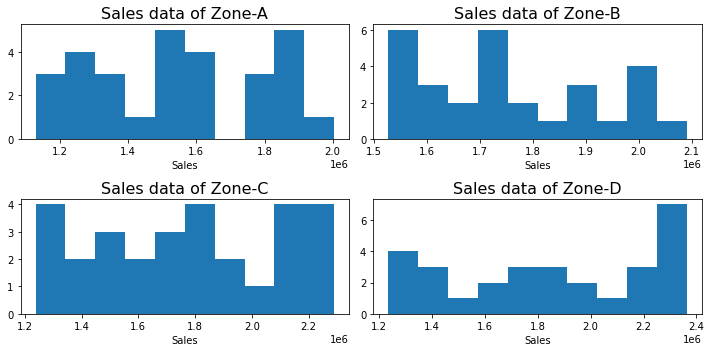

In [8]:
#histograms
plt.figure(figsize=(10,5))   
plt.subplot(2,2,1)
plt.hist(sales_data['Zone - A']) 
plt.title('Sales data of Zone-A',fontsize = 16)
plt.xlabel('Sales')

plt.subplot(2,2,2)
plt.hist(sales_data['Zone - B']) 
plt.title('Sales data of Zone-B',fontsize = 16)
plt.xlabel('Sales')

plt.subplot(2,2,3)
plt.hist(sales_data['Zone - C']) 
plt.title('Sales data of Zone-C',fontsize = 16)
plt.xlabel('Sales')

plt.subplot(2,2,4)
plt.hist(sales_data['Zone - D']) 
plt.title('Sales data of Zone-D',fontsize = 16)
plt.xlabel('Sales')
plt.tight_layout()

### 1. The mean sales generated by each zone.

In [9]:
#calculating the mean for all the zones
mean_sales = sales_data.drop("Month",axis=1).mean()
#converting exponential notation to float
mean_sales = mean_sales.apply(lambda x: format(x, '.2f'))
print("Mean sales generated by each zone is as follows:\n{}".format(mean_sales))

Mean sales generated by each zone is as follows:
Zone - A    1540493.14
Zone - B    1755559.59
Zone - C    1772871.03
Zone - D    1842926.76
dtype: object


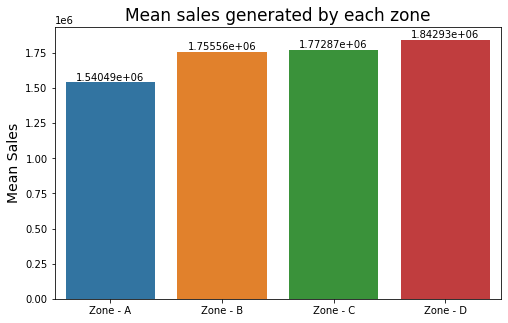

In [10]:
#bar graph 
plt.figure(figsize=(8,5))
ax=sns.barplot(x=mean_sales.index.values, y=mean_sales.values.astype(float))
plt.title("Mean sales generated by each zone",fontsize=17)
plt.ylabel("Mean Sales",fontsize=14)
plt.bar_label(ax.containers[0])
plt.show()

### 2. Total sales generated by all the zones for each month.

In [11]:
#copying column Month from sales_data to a new dataframe total_data
total_data=sales_data[['Month']].copy()
#calculating the row-wise sum or total sales generated by all the zones for each month
total_data['Total sales'] = sales_data.sum(axis=1)
print("Total sales generated by all the zones for each month are as follows:")
display(total_data)

Total sales generated by all the zones for each month are as follows:


,Month,Total sales
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328
5,Month - 6,7151387
6,Month - 7,7287108
7,Month - 8,7816299
8,Month - 9,6703395
9,Month - 10,7128210


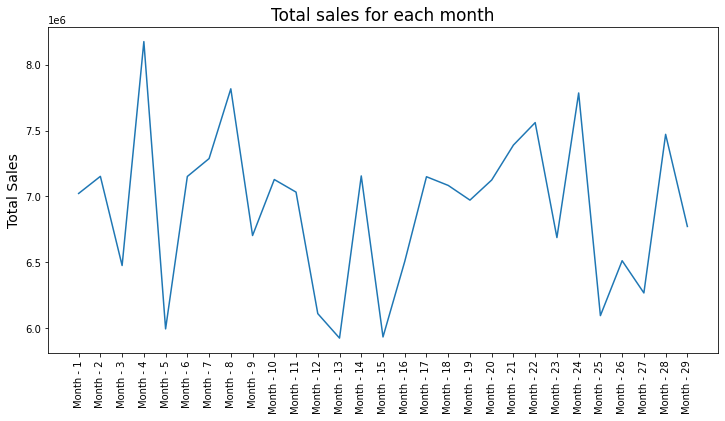

In [12]:
#line chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(total_data['Month'], total_data['Total sales'])
plt.title("Total sales for each month",fontsize=17)
plt.ylabel("Total Sales",fontsize=14)
plt.xticks(rotation=90)
plt.show()

### 3. Check whether all the zones generate the same amount of sales.

Here we have to use One-way ANOVA test.

* **Null Hypothesis, H<sub>0</sub>:** The sales generated by all the zones are equal.  
* **Alternative Hypothesis, H<sub>a</sub>:** The sales generated by all the zones are not all equal.

In [13]:
#setting the significance level(alpha) to 0.05
alpha = 0.05

In [14]:
#calculating f-statistic and p-value
f,p = f_oneway(sales_data['Zone - A'],sales_data['Zone - B'],sales_data['Zone - C'],sales_data['Zone - D'])
print("F-statistic = %.3f\np-value = %.3f"%(f,p))

F-statistic = 5.672
p-value = 0.001


In [15]:
#comparing p-value and significance level
if p < alpha:
    print("We reject Null hypothesis.\n"+"\033[1m"+"The sales generated by atleast one zone is different."+"\033[0m")
else:
    print("We fail to reject Null hypothesis.\n"+"\033[1m"+"All the zones generate the same amount of sales."+"\033[0m")

We reject Null hypothesis.
The sales generated by atleast one zone is different.
